In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.insert(32, 'diagnosis', df.pop('diagnosis'))
df.shape

(569, 33)

<AxesSubplot:>

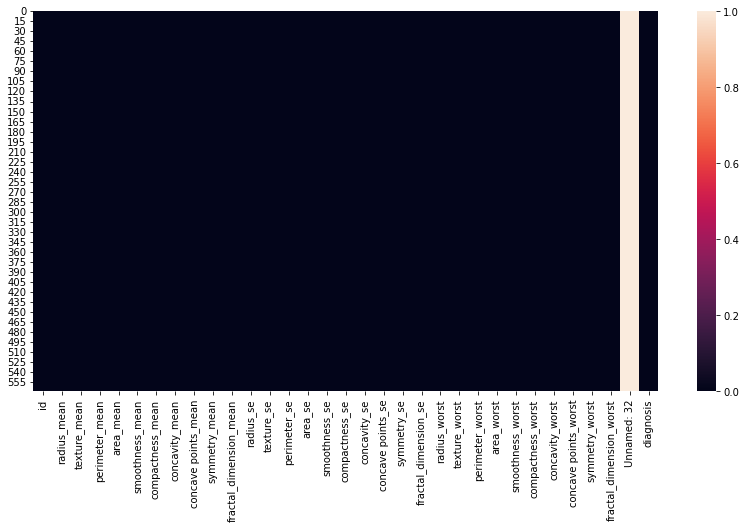

In [6]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull())

In [7]:
print("The column with more than 30% null values is/are :", end=" ")
for col in df.columns:
    if df[col].isnull().sum() > (569*30/100):
        print(col)

The column with more than 30% null values is/are : Unnamed: 32


In [8]:
#Lets remove this column from our dataset

df.drop(columns=['Unnamed: 32'], inplace=True)
df.shape

(569, 32)

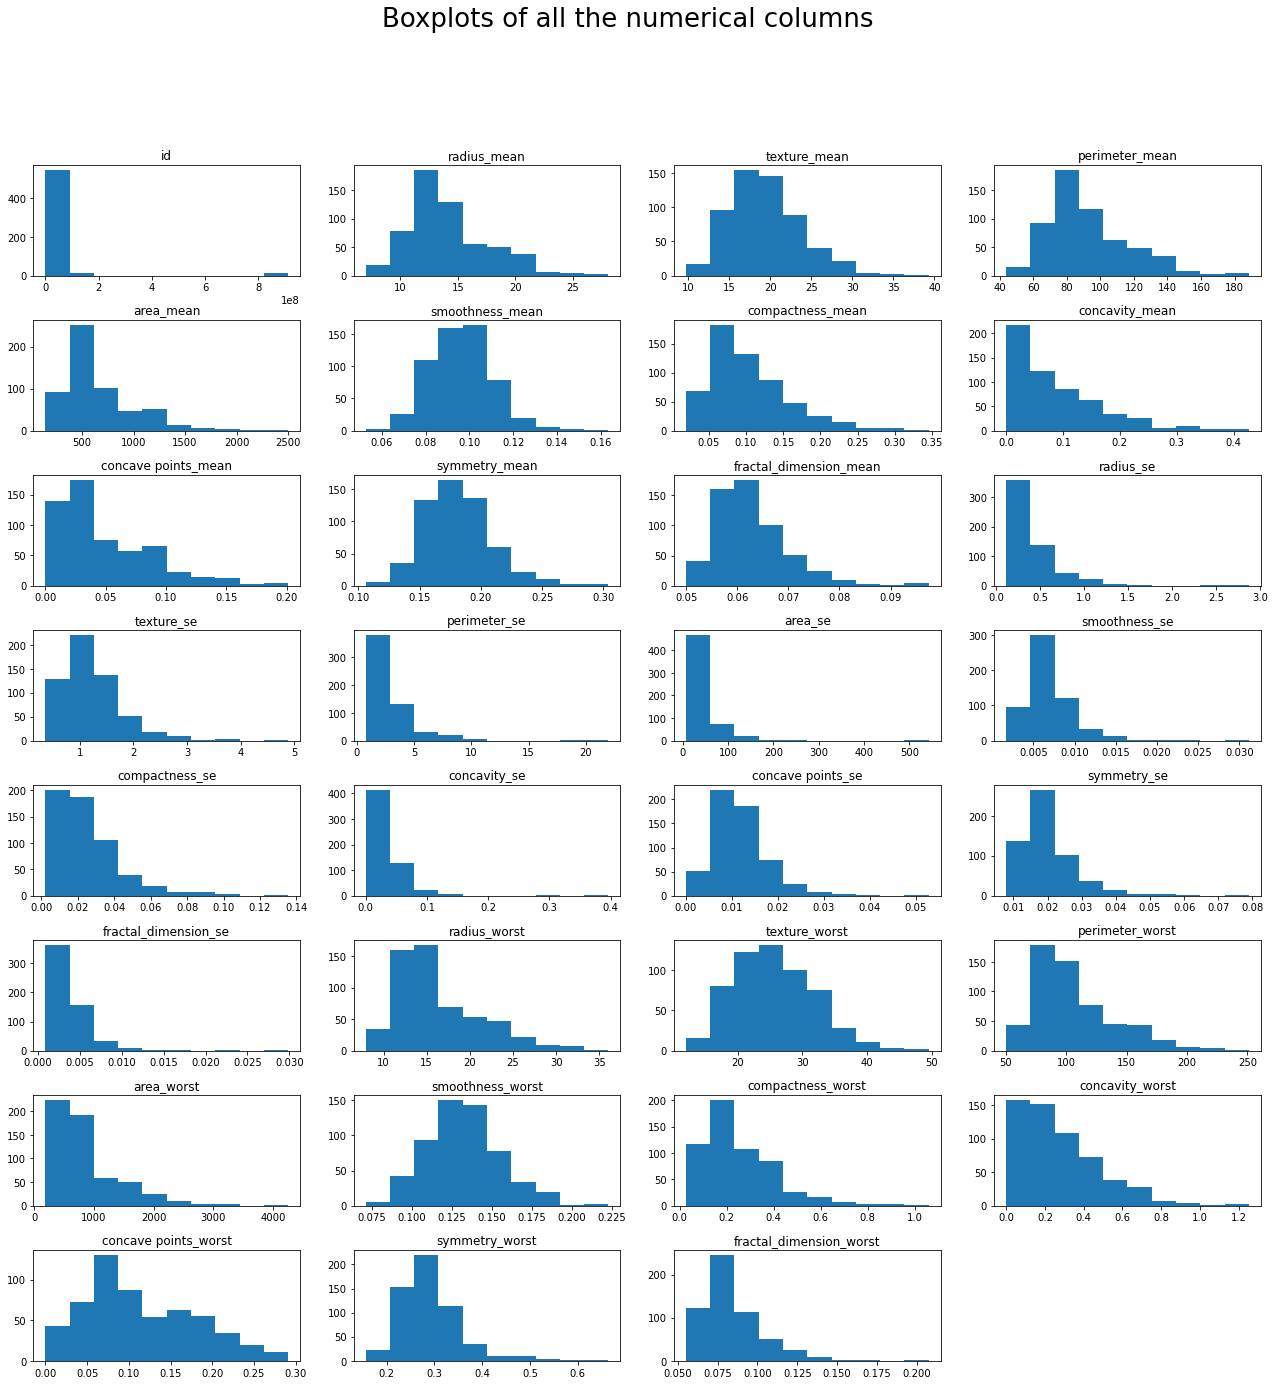

In [9]:
#Lets try to find out if there are so many outliers present or not in our model.

plt.figure(figsize=(22,22))
plt.suptitle('Boxplots of all the numerical columns', fontsize = 26)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i, clnm in enumerate(df.loc[:,df.dtypes != 'object'].columns):
    plt.subplot(8,4,i+1)
    plt.hist(df[clnm])
    plt.title(clnm)

<AxesSubplot:>

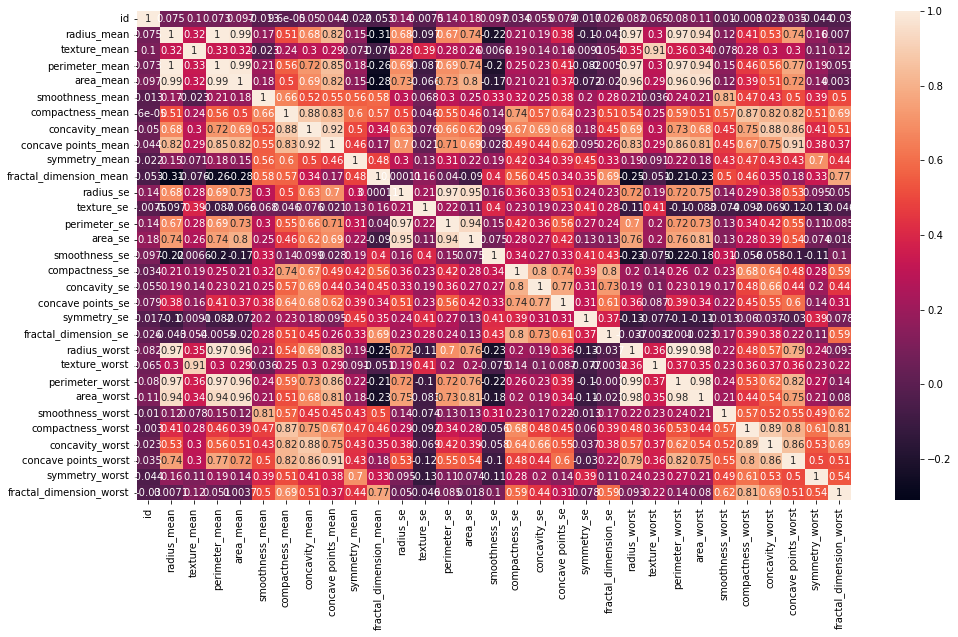

In [10]:
#Lets have a look at the features, and see if there is high correlation between the features. We shall remove such features.

corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [11]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype('bool'))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

<AxesSubplot:>

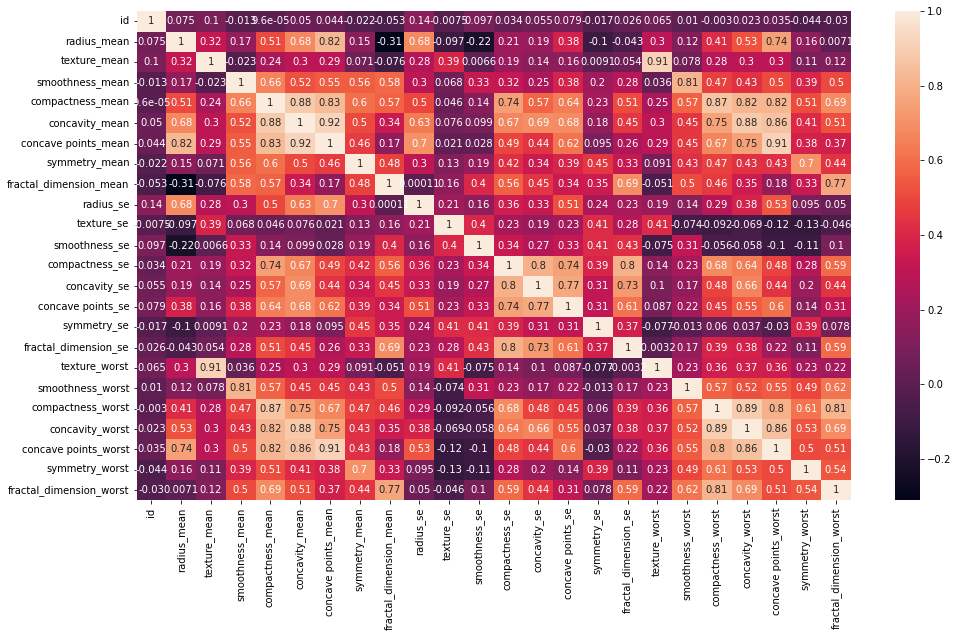

In [12]:
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

Now we see that our highly correlated features are removed. Since they put the same affect on the model, we have removed them. The data looks clear and hence we are good to go for our model.

In [20]:
Y = df['diagnosis']
X = df.drop(columns=['diagnosis','id'])  #We removed id because it is not a feature, its a identification for the particular test, or data row.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.25 , random_state=3)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = clf.predict(X_test)

In [18]:
clf.score(X_test, y_test)

0.9695550351288056

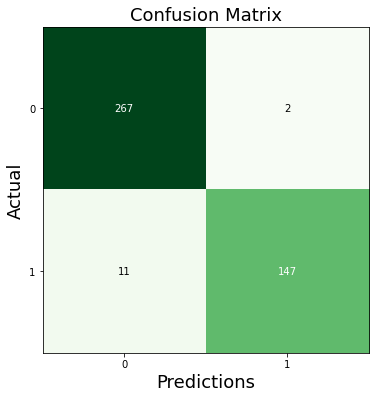

In [19]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

cm = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()